In [1]:
import tensorflow as tf

In [3]:
hellotest = tf.constant('Hello World')
type(hellotest)

tensorflow.python.framework.ops.Tensor

In [4]:
x =  tf.constant(100)

# Start a session

In [5]:
sess = tf.Session()

In [6]:
sess.run(hellotest)

b'Hello World'

In [7]:
sess.run(x)

100

In [8]:
# Operations

x = tf.constant(2)

In [10]:
y = tf.constant(3)

In [11]:
with tf.Session() as sess:
    print('Operations with constants')
    print(sess.run(x+y))
    

Operations with constants
5


In [12]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)


In [13]:
add = tf.add(x,y)

In [15]:
import numpy as np

In [16]:
a = np.array([[5.0, 5.0]])
b = np.array([[2.0], [2.0]])

In [17]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [18]:
matrix_multi = tf.matmul(mat1, mat2)

In [19]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[ 20.]]


# MNIST DATA

In [20]:
# MNIST
from tensorflow.examples.tutorials.mnist import input_data

In [21]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [22]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [24]:
mnist.train.images.shape

(55000, 784)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

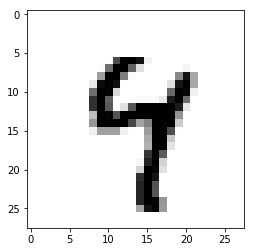

In [27]:
sample = mnist.train.images[2].reshape(28,28)
plt.imshow(sample, cmap='Greys')

In [59]:
learning_rate = 0.001
training_epochs = 15 #cycles
batch_size = 100


In [31]:
n_classes = 10 #0-9 clases
n_samples = mnist.train.num_examples
print(n_samples)

55000


In [32]:
n_input = 784 # because we dealing by 28/28 

In [37]:
n_hidden_1 = 256
n_hidden_2 = 256

In [48]:
# Multilayer perception
def multilayer_perceptron(x, weights, biases):
    """
    x: Placeholder for Data Input
    weights: Dictionary of weights
    Biases: Dictionary of bias values
    """
    
    #First Hidden Layer with RELU (rectifer activation function)
    # Multiply weight by input, then add bias
    # Then pass thruough a funciton RELU -> f(x) = max(0,x)
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [49]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])), 
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [50]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])), 
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [51]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])


In [52]:
pred = multilayer_perceptron(x, weights, biases)

In [55]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training the Model and Session

In [56]:
sess = tf.InteractiveSession()

In [57]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [58]:
sess.run(init)

In [61]:
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        #We are grabbing batches of data
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer, cost], feed_dict = {x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1,avg_cost))

print("Model has compelted {} Epochs of training".format(training_epochs))

Epoch: 1 cost161.6197
Epoch: 2 cost38.7870
Epoch: 3 cost24.1210
Epoch: 4 cost16.8087
Epoch: 5 cost12.2894
Epoch: 6 cost9.1143
Epoch: 7 cost6.6680
Epoch: 8 cost4.8798
Epoch: 9 cost3.6216
Epoch: 10 cost2.6609
Epoch: 11 cost1.9984
Epoch: 12 cost1.5084
Epoch: 13 cost1.1648
Epoch: 14 cost0.8307
Epoch: 15 cost0.7072
Model has compelted 15 Epochs of training


In [69]:
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
# This is checking 1 and 0 for what was correct

In [63]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [67]:
correct_pred = tf.cast(correct_pred, 'float')

In [68]:
accuracy = tf.reduce_mean(correct_pred)

In [70]:
# Evaluate accuracy
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9483

## Contrib.Learn

In [71]:
from sklearn.datasets import load_iris

In [72]:
iris = load_iris()

In [74]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [75]:
X = iris['data']

In [76]:
y = iris['target']

In [77]:
from sklearn.cross_validation import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
import tensorflow.contrib.learn as learn